# Crime data from 2016

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls data/2016

apr16.xls*  dec16.xls*  jan16.xls*  jun16.xls*  may16.xls*  oct16.xls*
aug16.xls*  feb16.xls*  jul16.xls*  mar16.xls*  nov16.xls*  sep16.xls*


In [3]:
path = 'data/2016'

In [4]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [5]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2016-04-10,20,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1
1,2016-04-11,19,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2
2,2016-04-12,20,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,-,1
3,2016-04-13,2,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,-,1
4,2016-04-14,3,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,-,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 10 columns):
Date            122693 non-null datetime64[ns]
Hour            122693 non-null int64
Offense Type    122693 non-null object
Beat            122693 non-null object
Premise         121293 non-null object
BlockRange      122693 non-null object
StreetName      122693 non-null object
Type            122693 non-null object
Suffix          122693 non-null object
# offenses      122693 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.4+ MB


## Check for missing values

In [7]:
df.apply(lambda x: sum(x.isnull()))

Date               0
Hour               0
Offense Type       0
Beat               0
Premise         1400
BlockRange         0
StreetName         0
Type               0
Suffix             0
# offenses         0
dtype: int64

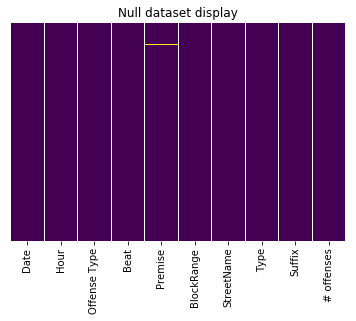

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Cleanup

- joining similar columns
- renaming

In [9]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2016-04-10,20,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1
1,2016-04-11,19,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2
2,2016-04-12,20,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,-,1
3,2016-04-13,2,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,-,1
4,2016-04-14,3,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,-,1


In [10]:
df.rename(columns={
    '# offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 10 columns):
Date           122693 non-null datetime64[ns]
Hour           122693 non-null int64
OffenseType    122693 non-null object
Beat           122693 non-null object
Premise        121293 non-null object
BlockRange     122693 non-null object
StreetName     122693 non-null object
Type           122693 non-null object
Suffix         122693 non-null object
NumOffenses    122693 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.4+ MB


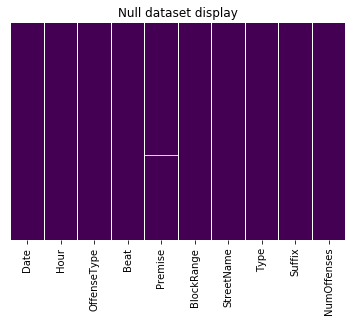

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [12]:
df.apply(lambda x: sum(x.isnull()))

Date              0
Hour              0
OffenseType       0
Beat              0
Premise        1400
BlockRange        0
StreetName        0
Type              0
Suffix            0
NumOffenses       0
dtype: int64

## Subset dataframe to work on 

In [13]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 8 columns):
Date           122693 non-null datetime64[ns]
Beat           122693 non-null object
BlockRange     122693 non-null object
StreetName     122693 non-null object
OffenseType    122693 non-null object
Premise        121293 non-null object
NumOffenses    122693 non-null int64
Hour           122693 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.5+ MB


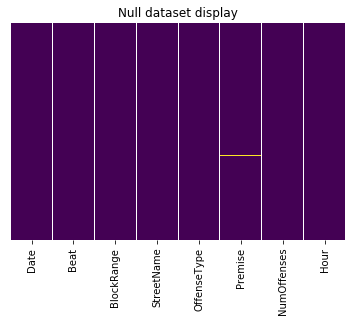

In [14]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

# FIND NAN

## Find NaN
- drop if > 2 nan

In [15]:
crimes.apply(lambda x: sum(x.isnull()))

Date              0
Beat              0
BlockRange        0
StreetName        0
OffenseType       0
Premise        1400
NumOffenses       0
Hour              0
dtype: int64

In [16]:
crimes[crimes.isnull().any(axis=1)].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
176,2016-04-23,10H40,1000-1099,ELGIN,Theft,NaN,1,19
309,2016-04-02,10H60,5900-5999,SCOTT,Theft,NaN,1,9
326,2016-04-27,10H60,2300-2399,WICHITA,Burglary,NaN,1,5
485,2016-04-10,10H80,1100-1199,AUTREY,Theft,NaN,1,10
670,2016-04-26,11H10,7400-7499,SATSUMA,Aggravated Assault,NaN,1,15


## Problem
- find nan values and fix

In [17]:
null_premise = crimes.Premise.isnull()

In [18]:
crimes['Premise'] = crimes["Premise"].fillna('none')

In [19]:
crimes.apply(lambda x: sum(x.isnull()))

Date           0
Beat           0
BlockRange     0
StreetName     0
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
dtype: int64

## Inspect each column

In [20]:
crimes.dtypes

Date           datetime64[ns]
Beat                   object
BlockRange             object
StreetName             object
OffenseType            object
Premise                object
NumOffenses             int64
Hour                    int64
dtype: object

## Beat column
- total beats should be around 120

In [21]:
len(crimes.Beat.value_counts())

120

In [22]:
len(crimes.Beat.value_counts(dropna=False))

120

In [23]:
crimes.Beat.unique()[:10]

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20'], dtype=object)

In [24]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [25]:
len(crimes.Beat.value_counts(dropna=False))

120

In [26]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [27]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

120

In [28]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I30', '21I40', '21I50', '21I60', '23J50',
       '24C10', '24C20', '24C30', '24C40', '24C50', '24C60', '2A10',
       '2A20', '2A30', '2A40', '2A50', '2A60', '3B10', '3B30', '3B40',
       '3B50', '4F10', '4F20', '4F30', '5F10', '5F20', '5F30', '5F40',
       '6B10', '6B20', '6B30', '6B40', '6B50', '6B60', '7C10', '7C20',
       '7C30',

In [29]:
crimes.Beat.value_counts(dropna=False).head()

1A20     3049
12D10    2576
19G10    2386
1A30     2273
2A50     2259
Name: Beat, dtype: int64

## BlockRange

In [30]:
len(crimes.BlockRange.value_counts(dropna=False))

242

In [31]:
crimes.BlockRange.value_counts(dropna=False).head()

2300-2399    1752
100-199      1707
900-999      1582
2400-2499    1529
1000-1099    1484
Name: BlockRange, dtype: int64

In [32]:
# strip
crimes.BlockRange =crimes.BlockRange.str.strip()

In [33]:
len(crimes.BlockRange.value_counts(dropna=False))

242

## StreetName

In [34]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7844


In [35]:
# remove extra spaces
crimes.StreetName = crimes.StreetName.str.strip()


# make all lower case
crimes.StreetName = crimes.StreetName.str.lower()

In [36]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7844


In [37]:
print(crimes.StreetName.value_counts(dropna=False).head())

westheimer     3768
sam houston    1792
gulf           1785
katy           1696
gessner        1680
Name: StreetName, dtype: int64


## OffenseType
Total 7
- Theft
- Burlary
- Aggravated Assalult
- Robbery
- Auto Theft
- Rape
- Murder


In [38]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:8


In [39]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [40]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:8


In [41]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 69219
Burglary              18442
Auto Theft            12690
Aggravated Assault    10866
Robbery                9955
Rape                   1232
Murder                  285
NaN                       4
Name: OffenseType, dtype: int64


In [42]:
# join Auto Theft & AutoTheft
crimes.OffenseType = crimes.OffenseType.replace('AutoTheft','Auto Theft')

#### fill nans with most common value

In [43]:
crimes = crimes.fillna(crimes['OffenseType'].value_counts().index[0])

In [44]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 69223
Burglary              18442
Auto Theft            12690
Aggravated Assault    10866
Robbery                9955
Rape                   1232
Murder                  285
Name: OffenseType, dtype: int64


## Premise

In [45]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:126


In [46]:
crimes.Premise = crimes.Premise.str.strip()
crimes.Premise = crimes.Premise.str.lower()

In [47]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:126


In [48]:
crimes.Premise.value_counts(dropna=False).head()

residence or house                     17013
apartment parking lot                  13931
road, street, or sidewalk              12857
apartment                              11923
restaurant or cafeteria parking lot     5034
Name: Premise, dtype: int64

# Date column

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 10 columns):
Date           122693 non-null datetime64[ns]
Hour           122693 non-null int64
OffenseType    122693 non-null object
Beat           122693 non-null object
Premise        121293 non-null object
BlockRange     122693 non-null object
StreetName     122693 non-null object
Type           122693 non-null object
Suffix         122693 non-null object
NumOffenses    122693 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.4+ MB


## Date
- make datetime index

In [50]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [51]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
Date,,,,,,,
1916-05-23,10H70,UNK,liberty road,Aggravated Assault,residence or house,1,19
1916-08-06,6B30,5800-5899,houston rosslyn,Burglary,rental storage facility,1,9
1916-10-22,18F20,5300-5399,alabama,Theft,commercial parking lot or garage,1,9
1916-10-22,19G40,8400-8499,cook,Burglary,"vacant storage fac (barn,garage,warehouse)",1,15
1916-10-22,20G30,2900-2999,hayes,Theft,apartment,1,13


## Create Columns with day,weekday,month,year from datetime index

It allows us to view incorect reports by date better

In [52]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [53]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1916-05-23,10H70,UNK,liberty road,Aggravated Assault,residence or house,1,19,23,Tuesday,May,1916
1916-08-06,6B30,5800-5899,houston rosslyn,Burglary,rental storage facility,1,9,06,Sunday,Aug,1916
1916-10-22,18F20,5300-5399,alabama,Theft,commercial parking lot or garage,1,9,22,Sunday,Oct,1916
1916-10-22,19G40,8400-8499,cook,Burglary,"vacant storage fac (barn,garage,warehouse)",1,15,22,Sunday,Oct,1916
1916-10-22,20G30,2900-2999,hayes,Theft,apartment,1,13,22,Sunday,Oct,1916


In [54]:
crimes.year.value_counts(dropna=False)

2016    121421
2015       992
2014       115
2013        42
2012        21
2007        16
2010        15
2008         7
2006         7
2009         6
2011         5
1916         5
2001         5
2002         4
1992         3
1977         3
2003         2
1998         2
2005         2
2004         2
1999         1
1983         1
1921         1
1971         1
1986         1
1926         1
1993         1
1965         1
1985         1
1990         1
1982         1
1997         1
1991         1
2000         1
1918         1
1989         1
1919         1
1920         1
Name: year, dtype: int64

We can see now that many reports have incorect year

In [55]:
yr = crimes.year == '2016'
len(crimes[~yr].year.value_counts())

37

## null values

- check
- count
- display

In [56]:
crimes.apply(lambda x: sum(x.isnull()))

Beat           0
BlockRange     0
StreetName     0
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
day            0
weekday        0
month          0
year           0
dtype: int64

In [57]:
# display any null
len(crimes[crimes.isnull().any(axis=1)])

0

In [58]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [59]:
crimes = crimes.dropna(subset=['BlockRange', 'StreetName'])

In [60]:
crimes.apply(lambda x: sum(x.isnull()))

Beat           0
BlockRange     0
StreetName     0
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
day            0
weekday        0
month          0
year           0
dtype: int64

## New Dataframe
- remove premise col
- keep premise description

In [61]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1916-05-23,10H70,UNK,liberty road,Aggravated Assault,residence or house,1,19,23,Tuesday,May,1916
1916-08-06,6B30,5800-5899,houston rosslyn,Burglary,rental storage facility,1,9,06,Sunday,Aug,1916
1916-10-22,18F20,5300-5399,alabama,Theft,commercial parking lot or garage,1,9,22,Sunday,Oct,1916
1916-10-22,19G40,8400-8499,cook,Burglary,"vacant storage fac (barn,garage,warehouse)",1,15,22,Sunday,Oct,1916
1916-10-22,20G30,2900-2999,hayes,Theft,apartment,1,13,22,Sunday,Oct,1916


In [62]:
crime_yr.isnull().values.any().any()

False

In [63]:
# display any null
len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [64]:
crime_yr[crime_yr.isnull().any(axis=1)].tail()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [65]:
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122693 entries, 1916-05-23 to 2016-12-31
Data columns (total 11 columns):
Beat           122693 non-null object
BlockRange     122693 non-null object
StreetName     122693 non-null object
OffenseType    122693 non-null object
Premise        122693 non-null object
NumOffenses    122693 non-null int64
Hour           122693 non-null int64
day            122693 non-null object
weekday        122693 non-null object
month          122693 non-null object
year           122693 non-null object
dtypes: int64(2), object(9)
memory usage: 11.2+ MB


In [66]:
crime_yr.to_csv('data/clean/crime16_clean.csv')

In [67]:
ls data/clean

crime10_clean.csv*  crime12_clean.csv*  crime14_clean.csv*  crime16_clean.csv*
crime11_clean.csv*  crime13_clean.csv*  crime15_clean.csv*  crime17_clean.csv*
